# Data Science Works on Energy & Environment Data

Hello and welcome to everyone. Here, I will show you some infos and works about the <code>Energy & Environment</code> dataset.

Our aim is predicting which <code>Region</code> produces more CO2 emission by its energy consumption and other environmental factors.

Let's start with our data investigation part. Create imports.

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

print('Imports are successful!')

Imports are successful!


Take the dataset into the <code>df</code> variable.

In [2]:
# get data with pandas
df = pd.read_csv('/kaggle/input/energy-and-environment-data/energy_environment_data.csv')
df.head()

,Date,Region,Energy_Consumption_MWh,Renewable_Energy_Production_MWh,CO2_Emissions_tonnes,Air_Quality_Index,Temperature_C,Wind_Speed_mps,Solar_Radiation_Wm2,Population
0,2034-10-09,Region_A,482.59,49.51,117.70,199,1.1,0.49,299.35,264325
1,2037-04-23,Region_B,90.75,274.79,195.15,324,39.7,3.22,885.49,265642
2,2039-03-23,Region_A,497.45,231.25,123.84,455,39.6,5.02,356.66,369331
3,2043-03-23,Region_C,469.94,199.62,74.92,74,31.6,13.13,708.10,179670
4,2044-12-25,Region_D,81.87,209.15,196.59,268,-7.3,7.54,10.57,496359


Write the code that shows number of empty columns in the dataset.

In [3]:
# search for if null cells exist
print('Null cells counter:')
df.isnull().sum()

Null cells counter:


Date                               0
Region                             0
Energy_Consumption_MWh             0
Renewable_Energy_Production_MWh    0
CO2_Emissions_tonnes               0
Air_Quality_Index                  0
Temperature_C                      0
Wind_Speed_mps                     0
Solar_Radiation_Wm2                0
Population                         0
dtype: int64

There is no empty columns in the dataset... Great! We can continue without fulfilling any value in a cell. Let's see some informations about the dataset -especially type of its columns.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9695 entries, 0 to 9694
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Date                             9695 non-null   object 
 1   Region                           9695 non-null   object 
 2   Energy_Consumption_MWh           9695 non-null   float64
 3   Renewable_Energy_Production_MWh  9695 non-null   float64
 4   CO2_Emissions_tonnes             9695 non-null   float64
 5   Air_Quality_Index                9695 non-null   int64  
 6   Temperature_C                    9695 non-null   float64
 7   Wind_Speed_mps                   9695 non-null   float64
 8   Solar_Radiation_Wm2              9695 non-null   float64
 9   Population                       9695 non-null   int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 757.5+ KB


There are 2 columns in the dataset we can preprocess. 

* Date column can be separated like <code>Year</code>, <code>Month</code>, and <code>Day</code> -but we do not preprocess it because it will not be helpful for us.
* Region dataset can be enumerated like 1, 2, 3...

But we will see this steps in data preprocessing part of this project, right now, let's see the <code>statistical summary</code> and continue with <code>data visualization</code> part of this project.

In [5]:
df.describe(include='all')

,Date,Region,Energy_Consumption_MWh,Renewable_Energy_Production_MWh,CO2_Emissions_tonnes,Air_Quality_Index,Temperature_C,Wind_Speed_mps,Solar_Radiation_Wm2,Population
count,9695,9695,9695.000000,9695.000000,9695.000000,9695.000000,9695.000000,9695.000000,9695.000000,9695.000000
unique,6135,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2041-10-12,Region_B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,7,2489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,276.582152,155.320079,110.662818,249.291284,14.893584,7.471179,499.636939,508457.981949
std,NaN,NaN,129.489811,83.666717,52.117956,143.991897,14.345028,4.311439,288.831178,285603.297407
min,NaN,NaN,50.080000,10.010000,20.000000,0.000000,-10.000000,0.010000,0.010000,10222.000000
25%,NaN,NaN,164.095000,83.100000,65.260000,123.000000,2.500000,3.740000,250.185000,260431.000000
50%,NaN,NaN,278.840000,155.310000,110.620000,249.000000,14.900000,7.500000,498.090000,508192.000000
75%,NaN,NaN,389.745000,228.335000,155.325000,373.000000,27.200000,11.190000,751.345000,756230.000000


## Data Visualization

The time has come for data visualization part of this project. Firstly, we need to create some tables to make our job easier.

We will use our data with <code>Region</code> independent variable. Let's create our charts under this <code>Region</code> condition.

In [6]:
# df regions average
df_regions_average = df.drop(['Date'], axis=1)
df_regions_average = df_regions_average.groupby('Region').mean()

See what have we created.

In [7]:
df_regions_average.head()

,Energy_Consumption_MWh,Renewable_Energy_Production_MWh,CO2_Emissions_tonnes,Air_Quality_Index,Temperature_C,Wind_Speed_mps,Solar_Radiation_Wm2,Population
Region,,,,,,,,
Region_A,276.362782,153.253361,111.203542,254.147713,14.965506,7.458628,496.202942,511479.273185
Region_B,277.132157,155.354857,109.952507,244.014464,15.394898,7.429667,497.298626,505048.666935
Region_C,274.670248,158.052540,110.484911,249.373604,14.633388,7.503959,510.542867,507614.345470
Region_D,278.151089,154.586110,111.040798,249.857440,14.565129,7.493624,494.501297,509839.992519


As you can see, we have successfully done what we want to. So, right now we can create our tables. We use <code>matplotlib.pyplot</code> for our graph-creation process.

We will show everything with the <code>Region</code> column. Let's start.

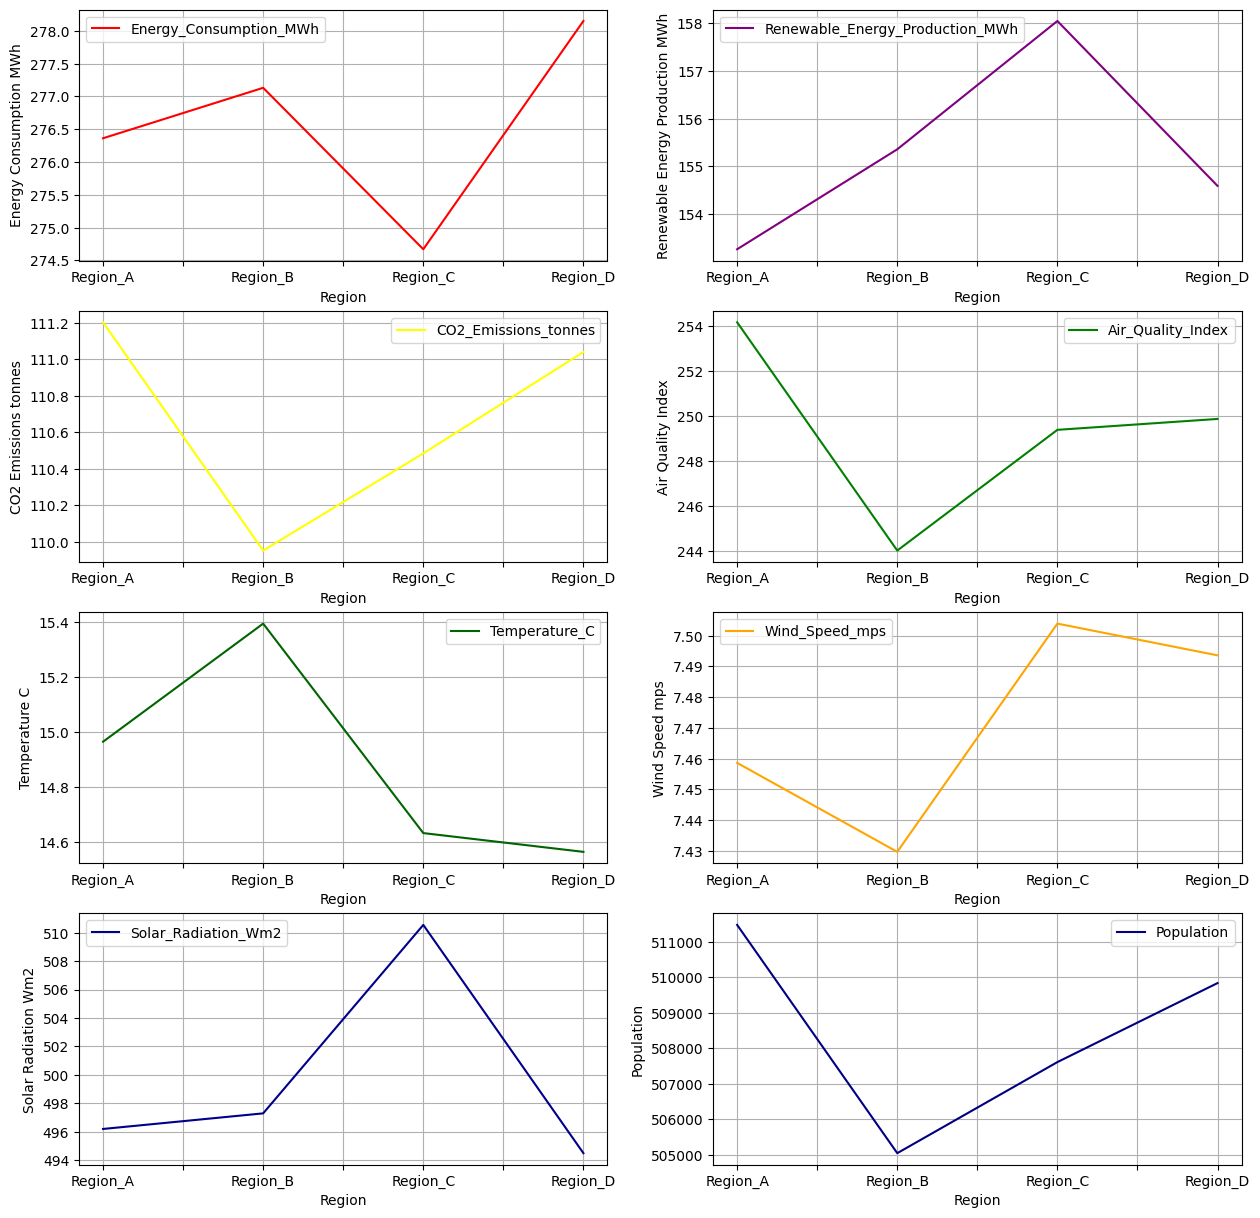

In [8]:
# create a graph and visualize relationships with our region column
# before running this cell, run df_regions_average creation cell, or you'll get error

df_regions_average.reset_index(inplace=True)
column_list = df_regions_average.columns.tolist()
column_list.remove('Region')
colors = ['red', 'purple', 'yellow', 'green', 'darkgreen', 'orange', 'darkblue', 'navy']

fig, axs = plt.subplots(4, 2, figsize=(15, 15))
axs = axs.flatten()

for i, col in enumerate(column_list):
    ax = df_regions_average.plot(kind='line', x='Region', y=col, ax=axs[i], color=colors[i])
    ax.set_ylabel(col.replace('_', ' '))
    ax.set_xlabel('Region')
    ax.grid()

plt.show()

From these charts, we can say lots of things:

* The highest <code>Energy Consumption (MWh)</code> came from <code>Region_D</code> and the lowest came from <code>Region_C</code>.
* The highest <code>Renewable Energy Production (MWh)</code> came from <code>Region_C</code> and the lowest came from <code>Region_A</code>.
* The highest <code>CO2 Emissions (Tonnes)</code> came from <code>Region_A</code> and the lowest came from <code>Region_B</code>.
* The highest <code>Air Quality Index</code> came from <code>Region_A</code> and the lowest came from <code>Region_B</code>.
* The highest <code>Temperature (C)</code> came from <code>Region_B</code> and the lowest came from <code>Region_D</code>.
* The highest <code>Wind Speed (Mps)</code> came from <code>Region_C</code> and the lowest came from <code>Region_B</code>.
* The highest <code>Solar Radiation (Wm2)</code> came from <code>Region_C</code> and the lowest came from <code>Region_D</code>.
* The highest <code>Population</code> came from <code>Region_A</code> and the lowest came from <code>Region_B</code>.

But commenting like this is not seem good... Let's create a table for better visualization.

|Feature|Highest|Lowest|
|-------|-------|------|
|Energy Consumption (MWh)|Region_D|Region_C|
|Renewable Energy Production (MWh)|Region_C|Region_A|
|CO2 Emissions (Tonnes)|Region_A|Region_B|
|Air Quality Index|Region_A|Region_B|
|Temperature (C)|Region_B|Region_D|
|Wind Speed (Mps)|Region_C|Region_B|
|Solar Radiation (Wm2)|Region_C|Region_D|
|Population|Region_A|Region_B|

That's it! We can see better relationships with <code>Region</code> column right now. Now, let's see the correlations with this column. But before, we will preprocess the data.

## Data Preprocessing

Let's preprocess our data. We dropped our <code>Date</code> column before, because it will not be helpful for us. The only thing is, we will map our <code>Region</code> column integer.

In [9]:
# region mapping
# run this cell just one time

df['Region'] = df['Region'].map({'Region_A': 1, 'Region_B': 2, 'Region_C': 3, 'Region_D': 4})
df['Region'] = df['Region'].astype(int)
df.head()

,Date,Region,Energy_Consumption_MWh,Renewable_Energy_Production_MWh,CO2_Emissions_tonnes,Air_Quality_Index,Temperature_C,Wind_Speed_mps,Solar_Radiation_Wm2,Population
0,2034-10-09,1,482.59,49.51,117.70,199,1.1,0.49,299.35,264325
1,2037-04-23,2,90.75,274.79,195.15,324,39.7,3.22,885.49,265642
2,2039-03-23,1,497.45,231.25,123.84,455,39.6,5.02,356.66,369331
3,2043-03-23,3,469.94,199.62,74.92,74,31.6,13.13,708.10,179670
4,2044-12-25,4,81.87,209.15,196.59,268,-7.3,7.54,10.57,496359


Then, let's see if we successfully convert our <code>Region</code> column to integer.

In [10]:
df['Region'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9695 entries, 0 to 9694
Series name: Region
Non-Null Count  Dtype
--------------  -----
9695 non-null   int64
dtypes: int64(1)
memory usage: 75.9 KB


So, we are successful! We can visualize correlations right now.

In [11]:
df.corr(numeric_only=True)

,Region,Energy_Consumption_MWh,Renewable_Energy_Production_MWh,CO2_Emissions_tonnes,Air_Quality_Index,Temperature_C,Wind_Speed_mps,Solar_Radiation_Wm2,Population
Region,1.000000,0.002471,0.008862,0.000178,-0.005569,-0.015387,0.004669,0.003155,-0.000840
Energy_Consumption_MWh,0.002471,1.000000,0.001180,-0.008770,0.014107,0.016465,0.007082,-0.007874,-0.001094
Renewable_Energy_Production_MWh,0.008862,0.001180,1.000000,-0.019584,-0.005208,-0.005488,0.006778,-0.006850,0.000417
CO2_Emissions_tonnes,0.000178,-0.008770,-0.019584,1.000000,0.007651,-0.000990,-0.001182,-0.004755,-0.002090
Air_Quality_Index,-0.005569,0.014107,-0.005208,0.007651,1.000000,0.008087,-0.004878,0.008091,-0.003796
Temperature_C,-0.015387,0.016465,-0.005488,-0.000990,0.008087,1.000000,-0.024707,0.014262,-0.007820
Wind_Speed_mps,0.004669,0.007082,0.006778,-0.001182,-0.004878,-0.024707,1.000000,0.009184,0.017052
Solar_Radiation_Wm2,0.003155,-0.007874,-0.006850,-0.004755,0.008091,0.014262,0.009184,1.000000,-0.008774
Population,-0.000840,-0.001094,0.000417,-0.002090,-0.003796,-0.007820,0.017052,-0.008774,1.000000


After this, we decided not to create any machine learning models after these bad correlations. Because:

1. **Dataset Quality Concerns:** Poor correlations may indicate that the dataset lacks meaningful relationships or that it doesn't carry sufficient information. In such cases, it is necessary to reassess the dataset or gather new data with stronger relationships before training the model. Training a model with low-quality data is unrealistic as it sets the expectation that good results can be derived from suboptimal inputs.

2. **Avoiding Misleading Results:** Low accuracy scores resulting from weak relationships suggest that the model will perform inadequately in real-world applications. Training such a model could lead to misinterpretation of results and potentially mislead decision-makers. Therefore, rather than proceeding with a model that is likely to produce low-quality results, it is more strategic to pause and conduct further analysis on the data.

So, that's it. We will not create a machine learning model.

This notebook reached its aim right now. Thank you reading until now.

### Mert Kont